# Features 1: Backtracks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "../data/"
PATHS_AND_GRAPH = DATA_FOLDER + "wikispeedia_paths-and-graph/"
PATHS_FINISHED = PATHS_AND_GRAPH + "paths_finished.tsv"
PATHS_UNFINISHED = PATHS_AND_GRAPH + "paths_unfinished.tsv"

In [3]:
paths_finished = pd.read_csv(
    PATHS_FINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"],
    encoding="utf-8",
    skiprows=16,
).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit="s")

In [4]:
paths_unfinished = pd.read_csv(
    PATHS_UNFINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"],
    encoding="utf-8",
    skiprows=17,
).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit="s")

## The number of backtracks in each path

d:\applications\miniconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\applications\miniconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


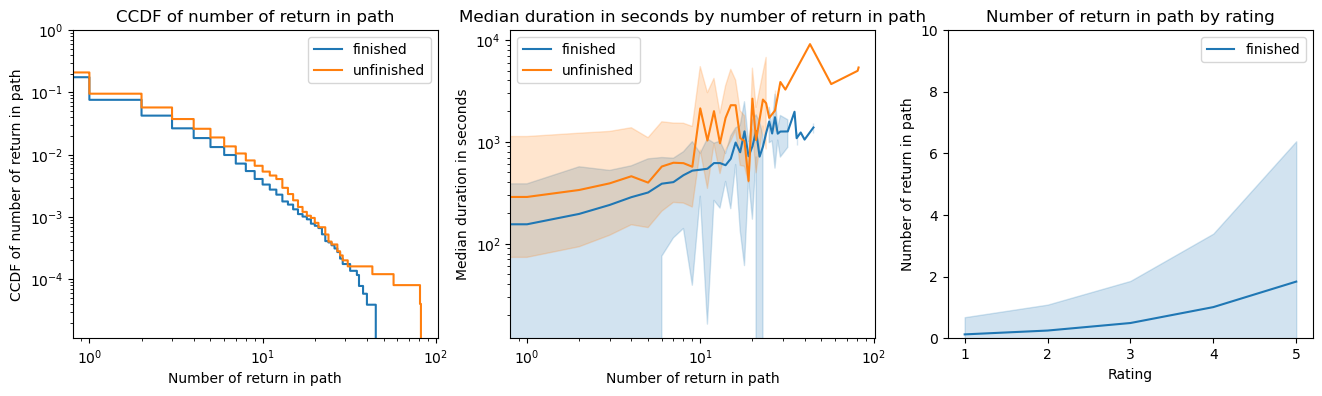

In [5]:
paths_finished["backtrack"] = paths_finished["path"].str.count("<")
paths_unfinished["backtrack"] = paths_unfinished["path"].str.count("<")
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.ecdfplot(
    paths_finished["backtrack"], label="finished", ax=axs[0], complementary=True
).set(
    xscale="log",
    yscale="log",
    ylabel="CCDF of number of return in path",
    xlabel="Number of return in path",
    title="CCDF of number of return in path",
)
sns.ecdfplot(
    paths_unfinished["backtrack"], label="unfinished", ax=axs[0], complementary=True
).set(
    xscale="log",
    yscale="log",
    ylabel="CCDF of number of return in path",
    xlabel="Number of return in path",
)
axs[0].legend()

sns.lineplot(
    paths_finished,
    x="backtrack",
    y="durationInSec",
    ax=axs[1],
    label="finished",
    errorbar="sd",
    estimator="median",
).set(
    xscale="log",
    yscale="log",
    ylabel="Median duration in seconds",
    xlabel="Number of return in path",
    title="Median duration in seconds by number of return in path",
)
sns.lineplot(
    paths_unfinished,
    x="backtrack",
    y="durationInSec",
    ax=axs[1],
    label="unfinished",
    errorbar="sd",
    estimator="median",
).set(xscale="log", yscale="log")
axs[1].legend()

sns.lineplot(
    paths_finished,
    x="rating",
    y="backtrack",
    ax=axs[2],
    label="finished",
    errorbar="sd",
).set(
    ylim=(0, 10),
    ylabel="Number of return in path",
    xlabel="Rating",
    title="Number of return in path by rating",
)
axs[2].legend()

We can see that the number of return in a path seems to follow a power law distribution and that in unfinished paths you typically have more return. Moreover there is a positive trend between the median duration of the path and the number of return in the path, as expected. Similarly, the number of return has a tendancy to be higher for paths that were considered as more complex by the player.